# Probability and Statistics

These concepts are foundational in data science, enabling us to quantify uncertainty and variability in data.

## Random Variables

### Discrete Random Variables

Consider a random experiment where we roll a fair six-sided die. The result is uncertain, embodying a discrete random variable, which we can denote as $X$. This variable $X$ can take one of a finite set of values, each with its own probability.

- **Example**: If $X$ represents the outcome of rolling a die, then $X \in \{1, 2, 3, 4, 5, 6\}$, with $P(X = x) = \frac{1}{6}$ for each $x \in \{1, 2, 3, 4, 5, 6\}$.

### Continuous Random Variables

In contrast, consider measuring the time it takes for the next bus to arrive, which might be any positive real number. Here, we have a continuous random variable, say $Y$, which can take any value within an interval.

- **Example**: If $Y$ denotes the time (in minutes) for the next bus to arrive, then $Y \in [0, \infty)$. Here, $Y$ could be 2.5 minutes, 3.14159 minutes, or any other positive real number.

## Distributions

The probability distribution of a random variable provides a complete description of the likelihood of various outcomes.

- For a discrete variable $X$, the **probability mass function (PMF)** gives $P(X = x)$ for each possible $x$.
- For a continuous variable $Y$, the **probability density function (PDF)**, $f_Y(y)$, is such that the probability of $Y$ falling in an interval $[a, b]$ is given by $\int_a^b f_Y(y) \, dy$.

## Expectation

The expectation or expected value of a random variable provides a measure of the central tendency of its distribution.

- For a discrete random variable $X$, $E[X] = \sum_{x} x \cdot P(X = x)$.
- For a continuous random variable $Y$, $E[Y] = \int_{-\infty}^{\infty} y \cdot f_Y(y) \, dy$.

You can always think of the random variable as the "payoff" in a game, and the expectation is the "average payoff" in each round of the game if you play it many times.

We have $E[aX + bY] = aE[X] + bE[Y]$ for any constants $a$ and $b$.

## Variance

Variance quantifies the spread of a distribution around its mean, reflecting the variability of the random variable.

- For any random variable $X$, $\text{Var}(X) = E[(X - E[X])^2]$.
- Using linearity of expectation, we have $\text{Var}(X) = E[X^2] - (E[X])^2$.

## Covariance

Covariance provides a measure of how two random variables change together. For example, if we treat weight and height as random variables, then knowning that someone is taller than average might make it more likely that they have above-average weight.

For random variables $X$ and $Y$, the covariance is defined as $\text{Cov}(X, Y) = E[(X - E[X])(Y - E[Y])]$.

Using the linearity of expectation, we also have $\text{Cov}(X, Y) = E[XY] - E[X] \cdot E[Y]$.

## (Pearson) Correlation

Correlation is a standardized measure of how two random variables change together, ranging from -1 to 1.
$ \text{Corr}(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X) \cdot \text{Var}(Y)}}$.


## Independence

Intuitively, when two things are independent, the outcome of one does not influence the outcome of the other.

Two random variables, $X$ and $Y$, are considered independent if  $P(X = x, Y = y) = P(X = x) P(Y = y)$ for all $x$ and $y$. Intuitively, this means that knowing the value of one variable provides no information about the value of the other.

For example, if we flip two coins, and $X$ and $Y$ represent the outcomes of the first and second coin flips, respectively, then the outcomes are independent. The probability of getting two heads is $P(X = \text{heads}) \cdot P(Y = \text{heads}) = \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}$.


## Independence and Covariance

**Independence implies zero covariance. But the converse is not necessarily true.**

Exercise: If $X$ and $Y$ are independent, use the linearity of expectation to show that $\text{Cov}(X, Y) = 0$.

Consider a scenario where $X$ is a random variable uniformly distributed over $[-1, 1]$ and define $Y = X^2$. 
Now they are not independent. However, we can show that $\text{Cov}(X, Y) = 0$:
Recall $\text{Cov}(X, Y) = \mathbb{E}[X \cdot Y] - \mathbb{E}[X]\mathbb{E}[Y] = 0$.
In this example, $\mathbb{E}[X] = 0$, and $XY = X^3$ is an odd function, so $\mathbb{E}[X \cdot Y] = 0$ ( for every positive outcome, there is a corresponding negative outcome with the same probability).


# Causality

## Correlation is Not Causation

Correlation measures the strength and direction of a linear relationship between two variables. However, it does not imply causation.

For example: Ice cream sales and drowning incidents might be correlated (both increase in the summer), but one does not cause the other.

## Dependence is Not Causation

Suppose two light switches, A and B, control the light bulb in the following way: the light is on if (1) A on B off or (2) A off B on.
Assume the switch are independent "coin flips": equally likely to be on or off.
Then knowing the state of switch A gives no information about the light. But there is still a "cause and effect" relationship between the switch and the light. ( Example adapted from [here]((https://stats.stackexchange.com/questions/357255/does-statistical-independence-mean-lack-of-causation) ))

## Establishing Causality

Establishing causality is challenging, and might require controlled experiments beyond observational data.


# Computation

The following Python code demonstrates how to do computation related to the previous concepts.


## Estimating probabilities

When we don't know the probability of some event, we can estimate it by running the experiment many times and calculating the relative frequency of the event.



In [2]:
# generate list of random integers
import numpy as np


# estimating the probability of rolling a 6
# n is number of experiments, or sample size
# larger n, "closer" to true probability
n = 100
x = np.random.randint(1, 7, n)
p = np.sum(x == 6) / 100
print(p)


0.13


In [3]:
# uniform distribution on [0, 1]
# estimating the probability hitting [0, 0.5]
n = 100
x = np.random.rand(n)
p = np.sum(x < 0.5) / n
print(p)


0.46


## visualizing distribution using histogram

/Users/Ray/opt/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

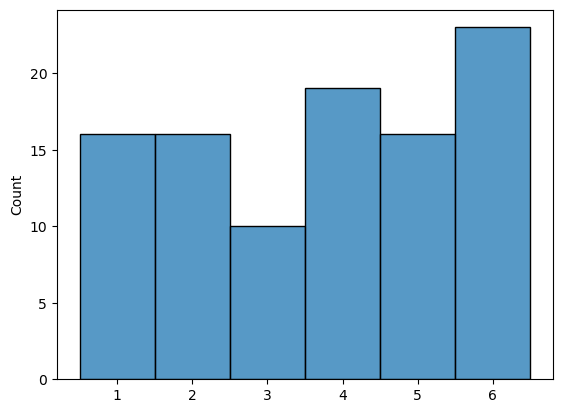

In [4]:
# for to visualize the distribution, we can use a histogram
import matplotlib.pyplot as plt
import seaborn
n = 100
x = np.random.randint(1, 7, n)
seaborn.histplot(x, discrete=True)

/Users/Ray/opt/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

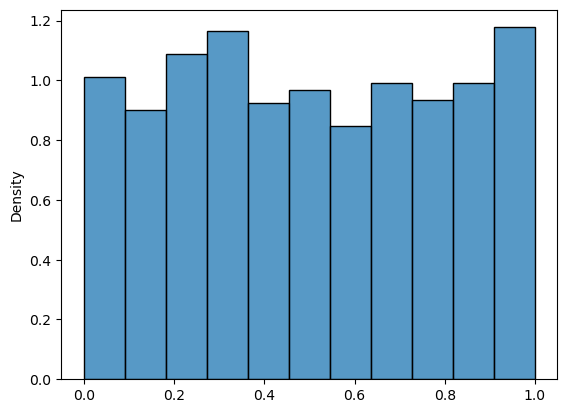

In [5]:
# generate uniform random numbers
x = np.random.rand(1000)
seaborn.histplot(x, stat='density')


/Users/Ray/opt/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


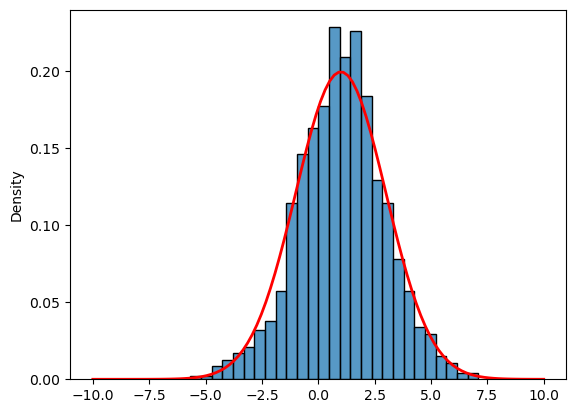

In [6]:
# gaussian normal distribution
# as n increases, the histogram looks more like the density function
# mu is the mean, sigma is the standard deviation
mu = 1 
sigma = 2
n = 1000 # sample size
x  = np.random.normal(mu, sigma, n) # generate samples from the normal distribution

# plot the histogram
fig, ax = plt.subplots()
seaborn.histplot(x, stat='density', ax=ax)

# plot the density function
x = np.linspace(-10, 10, 100)
f = (1/(sigma * np.sqrt(2 * np.pi)) *
     np.exp(- (x - mu)**2 / (2 * sigma**2)))
ax.plot(x,f,linewidth=2, color='r')

## How to estimate the E[X]
the expecttion can be estimated by the sample mean

Let $X_1, X_2, \ldots, X_n$ be samples from a random variable $X$. The sample mean $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$ approximate the $E[X]$

## Law of large numbers
The law of large numbers states that the sample mean converges to the expected value as the sample size increases.

Text(0, 0.5, 'estimated mean')

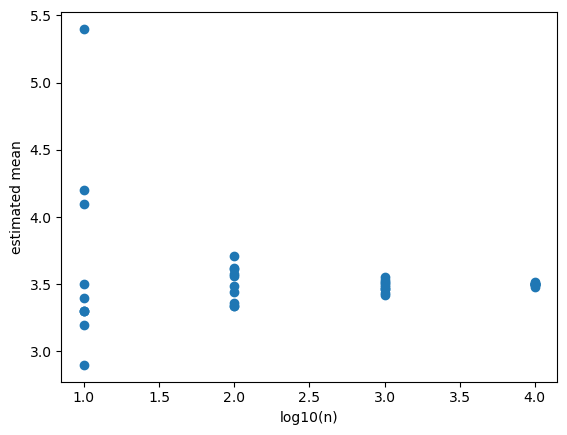

In [7]:
# In each experiment, we draw n samples and estimate the mean
# for small n, each estimation might have large variability from experiment to experiment
# as n increases, the variability decreases
n = [10,100,1000,10000]
k = 10 # number of repetitions for each n

# store the estimates, each row is a different n, each column is a different repetition
estiamtes = np.zeros((len(n), k))

# sample sizes
logn = [] # log10 of n
means = [] # estimated mean

for ni in n:
    for k in range(10):
        x = np.random.randint(1, 7, ni)
        logn.append(np.log10(ni))
        means.append(np.mean(x))

fig, ax = plt.subplots()
# scatter plot of 
ax.scatter(logn, means)
ax.set_xlabel('log10(n)')
ax.set_ylabel('estimated mean')

##  Estimation of variance

By definition the variance of a random variable X is defined as
$$ \text{Var}(X) = E[(X - E[X])^2]$$

We can estimate the variance by

$$ \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})^2$$

We essentially replace the expected value with the sample mean. (This is one way. For "unbiased estimation" in statistics, we would divide by $n-1$ instead of $n$. But for large $n$, the difference is negligible.)







In [8]:
# estimate variance of dice row
n = 100
x = np.random.randint(1, 7, n)
var1 = np.var(x)
var2 = np.mean((x - x.mean())**2)
print(var1, var2)   

2.6296 2.6296


## Correlation

0.09694956386037114
[[1.         0.81619762]
 [0.81619762 1.        ]]


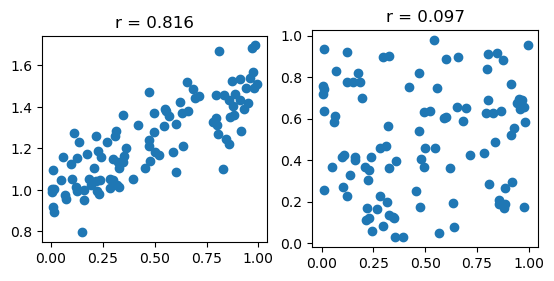

In [30]:
n = 100 # sample size

# X is a random variable uniformly distributed on [0, 1]
x = np.random.rand(n)

# Y is a linear function of X plus noise
y = 0.5*x+1 + np.random.normal(0, 0.1, n)

y2 = np.random.rand(n)




# compute our own correlation coefficient
# corr(x,y) = cov(x,y) / (std(x) * std(y))

my_coef = lambda x, y: np.mean((x - x.mean()) * (y - y.mean()))/(np.std(x) * np.std(y))


print(my_coef(x, y2))

# scatter plot
fig, ax = plt.subplots(1, 2)
ax[0].scatter(x, y)
ax[0].set_title(f'r = {my_coef(x, y):.3f}')
# equal axis
ax[0].set_aspect('equal')

ax[1].scatter(x, y2)
ax[1].set_title(f'r = {my_coef(x, y2):.3f}')
ax[1].set_aspect('equal')

# using numpy
# np.corrcoef returns a matrix M with the correlation coefficients [corr(x,x), corr(x,y); corr(y,x), corr(y,y)]
coef_matrix = np.corrcoef(x, y)
print(coef_matrix)

## Central limit theorem
Roughly speaking, sample average are normally distributed for large sample sizes, regardless of the distribution of the underlying random variable!

This explains why the normal distribution is so common.


If $X_1, X_2, \ldots, X_n$ are independent and identically distributed random variables with mean $\mu$ and variance $\sigma^2$,
if we define 
$$ Z =  \frac{\sqrt{n}(\bar{X} - \mu)}{\sigma}$$
then for large n, Z is approximately normally distributed with mean 0 and variance 1.


/Users/Ray/opt/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-5.0, 5.0)

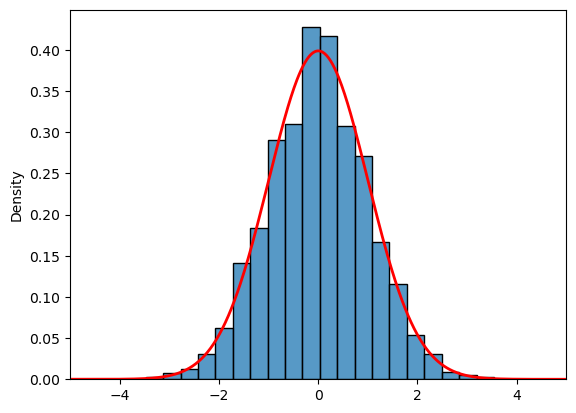

In [11]:
# we know that the coin flip has a mean of 0.5 and a variance of 0.25
gaussian_density = lambda x,mu,sigma: (1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2)))

mu = 0.5
sigma = np.sqrt(0.25)

# number of experiments, in each experiment we draw n samples, and estimate the mean
N = 10000
n = 1000

z_samples = []


for i in range(N):	

	# draw n samples
	x = np.random.randint(0, 2, n)
	# compute the sample mean
	sample_mean = np.mean(x)

	# do the transformation
	z = np.sqrt(n)*(sample_mean -  mu)/sigma

	z_samples.append(z)

# plot the histogram of z_samples
seaborn.histplot(z_samples, stat='density', bins=20)


# overlay the density function of the standard normal distribution
x = np.linspace(-10, 10, 1000)
y = gaussian_density(x, 0, 1)
plt.plot(x,y,linewidth=2, color='r')
plt.xlim(-5,5)